Note: you may need to restart the kernel to use updated packages.
Loading MNIST dataset...
Dataset loaded successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 146s 149ms/step - accuracy: 0.9305 - loss: 0.2255 - val_accuracy: 0.9837 - val_loss: 0.0495
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 137s 146ms/step - accuracy: 0.9765 - loss: 0.0791 - val_accuracy: 0.9875 - val_loss: 0.0359
Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 182s 194ms/step - accuracy: 0.9837 - loss: 0.0542 - val_accuracy: 0.9898 - val_loss: 0.0295
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 145s 154ms/step - accuracy: 0.9866 - loss: 0.0437 - val_accuracy: 0.9905 - val_loss: 0.0274
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 130s 139ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9903 - val_loss: 0.0277
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 130s 139ms/step - accuracy: 0.9901 - loss: 0.0311 - val_accuracy: 0.9914 - val_loss: 0.0270
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9914 - loss: 0.0270

✅ Test Accuracy: 99.14%

Visualizing sample predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


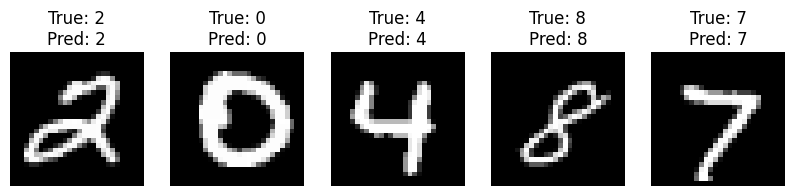


Model saved successfully as 'mnist_cnn_model'.


'\nTo deploy the model with Streamlit, create a new file named \'mnist_app.py\' and add this code:\n----------------------------------------------------------\n\nimport streamlit as st\nimport tensorflow as tf\nimport numpy as np\nfrom PIL import Image\n\nst.title("🧠 MNIST Digit Classifier")\nst.write("Upload a 28x28 grayscale iSmage of a handwritten digit.")\n\n# Load trained model\nmodel = tf.keras.models.load_model(\'mnist_cnn_model\')\n\nuploaded_file = st.file_uploader("Upload an image", type=["png", "jpg", "jpeg"])\n\nif uploaded_file is not None:\n    image = Image.open(uploaded_file).convert(\'L\').resize((28, 28))\n    img_array = np.array(image).astype(\'float32\') / 255.0\n    img_array = img_array.reshape(1, 28, 28, 1)\n\n    pred = model.predict(img_array)\n    pred_label = np.argmax(pred, axis=1)[0]\n\n    st.image(image, caption=f"Predicted Digit: {pred_label}", use_container_width=True)\n    st.success(f"The model predicts this digit as: {pred_label}")\n\n--------------

In [2]:
"""
Task 2: Deep Learning with TensorFlow
Dataset: MNIST Handwritten Digits (TensorFlow Datasets)

Goal:
1. Build a CNN model to classify handwritten digits
2. Achieve >95% test accuracy
3. Visualize model predictions on 5 sample images
4. Deploy model using Streamlit
"""

# === Step 1: Import Required Libraries ===
%pip install tensorflow tensorflow-datasets matplotlib streamlit
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# === Step 2: Load and Prepare Dataset ===
print("Loading MNIST dataset...")
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Normalize and batch
def normalize_img(image, label):
    """Normalizes images: uint8 -> float32"""
    return tf.cast(image, tf.float32) / 255.0, label

batch_size = 64
ds_train = ds_train.map(normalize_img).shuffle(1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)

print("Dataset loaded successfully.")

# === Step 3: Build CNN Model ===
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# === Step 4: Train the Model ===
epochs = 6
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=epochs
)

# === Step 5: Evaluate Model Performance ===
test_loss, test_acc = model.evaluate(ds_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# === Step 6: Visualize Predictions on 5 Sample Images ===
print("\nVisualizing sample predictions...")
for images, labels in ds_test.take(1):
    preds = model.predict(images[:5])
    pred_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {pred_labels[i]}")
        plt.axis('off')
    plt.show()

# === Step 7: Save the Model ===
model.save("mnist_cnn_model.keras")
print("\nModel saved successfully as 'mnist_cnn_model'.")

# === Step 8: Streamlit App for Deployment ===
"""
To deploy the model with Streamlit, create a new file named 'mnist_app.py' and add this code:
----------------------------------------------------------

import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

st.title("🧠 MNIST Digit Classifier")
st.write("Upload a 28x28 grayscale iSmage of a handwritten digit.")

# Load trained model
model = tf.keras.models.load_model('mnist_cnn_model')

uploaded_file = st.file_uploader("Upload an image", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert('L').resize((28, 28))
    img_array = np.array(image).astype('float32') / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    
    pred = model.predict(img_array)
    pred_label = np.argmax(pred, axis=1)[0]

    st.image(image, caption=f"Predicted Digit: {pred_label}", use_container_width=True)
    st.success(f"The model predicts this digit as: {pred_label}")

----------------------------------------------------------
Run the Streamlit app:
    streamlit run mnist_app.py
"""
